<a href="https://colab.research.google.com/github/mortyyy/Order-In/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


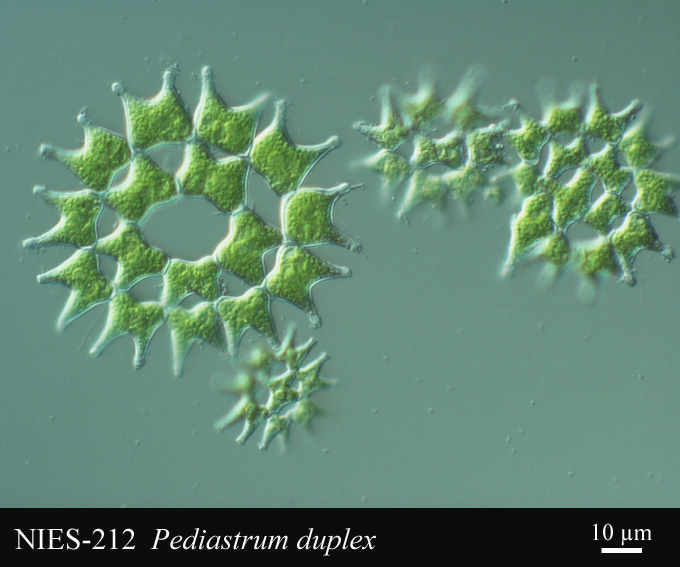

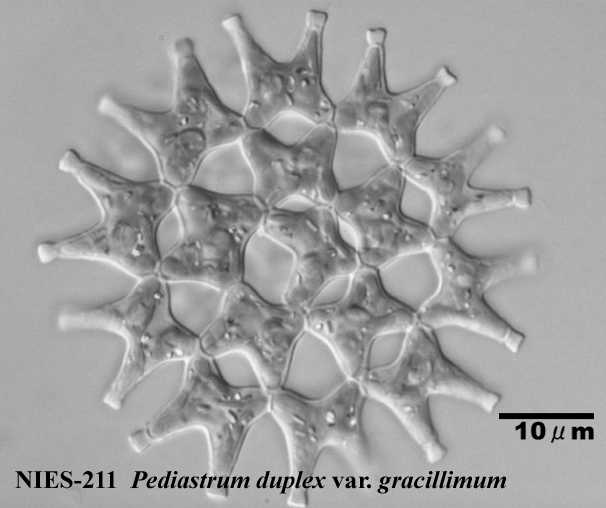

(567, 680, 3)
uint8
[[[153 125  94]
  [147 134  96]
  [137 140  94]
  ...
  [113 127  86]
  [113 124  84]
  [115 124  84]]

 [[148 131  98]
  [141 137  96]
  [133 141  94]
  ...
  [113 126  88]
  [115 126  88]
  [118 126  89]]

 [[138 138  98]
  [134 138  96]
  [130 140  94]
  ...
  [111 123  87]
  [113 123  87]
  [117 124  89]]

 ...

 [[ 12  12  12]
  [ 12  12  12]
  [ 12  12  12]
  ...
  [ 12  12  12]
  [ 12  12  12]
  [ 12  12  12]]

 [[ 12  12  12]
  [ 12  12  12]
  [ 12  12  12]
  ...
  [ 12  12  12]
  [ 12  12  12]
  [ 12  12  12]]

 [[ 12  12  12]
  [ 12  12  12]
  [ 12  12  12]
  ...
  [ 12  12  12]
  [ 12  12  12]
  [ 12  12  12]]]


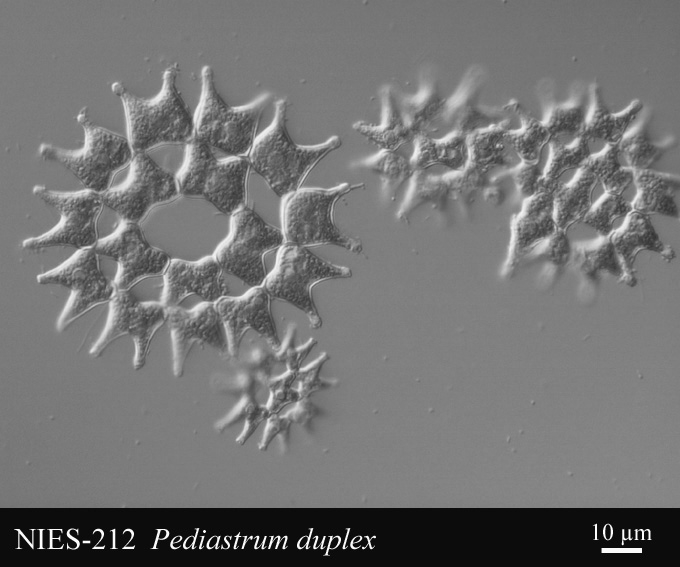

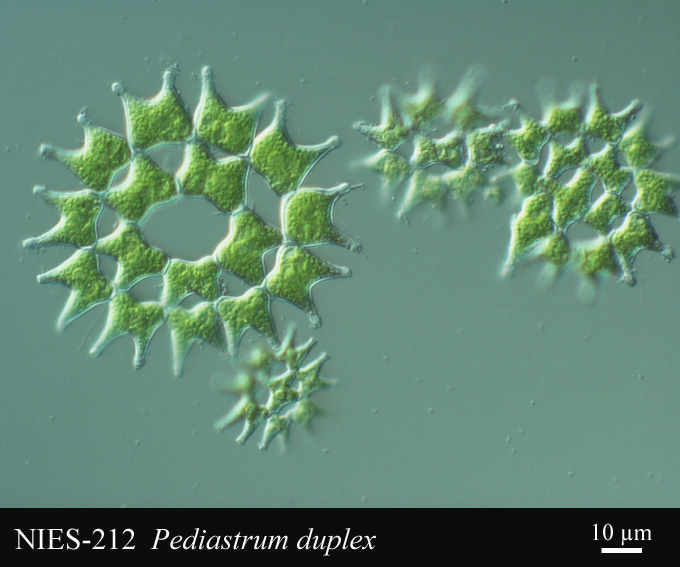

<ipython-input-21-7808a661f135>:72: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  img_merged_manual[row, col] = b, g, r


match


In [21]:
import cv2
import numpy as np

from google.colab.patches import cv2_imshow

from google.colab import drive
drive.mount('/content/gdrive')

img = cv2.imread("/content/gdrive/MyDrive/Pediastrum duplex 212.jpg", cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

template = cv2.imread('/content/gdrive/MyDrive/Pediastrum duplex 211.jpg', 0)
cv2_imshow(template)

if len(img.shape)==2:
    height,width = img.shape
    ch =1
else:
    height,width, ch = img.shape

print(img.shape)
print(img.dtype)
print(img)

img_gray = np.zeros([height, width, 1], img.dtype)



if len(img.shape) == 3:
  for row in range(height):
      for col in range(width):
          px = img[row, col]
          b, g, r = px
          img_gray[row, col] = r / 3 + g / 3 + b / 3
else:
  for row in range(height):
      for col in range(width):
          px = img[row, col]

          b, g, r = px[:3]
          img_gray[row, col] = r / 3 + g / 3 + b / 3


cv2_imshow(img_gray)


img_splitb = np.zeros([height, width, 1], img.dtype)
img_splitg = np.zeros([height, width, 1], img.dtype)
img_splitr = np.zeros([height, width, 1], img.dtype)
img_merged_manual = np.zeros(img.shape, img.dtype)


b_img, g_img, r_img = cv2.split(img)
img_merged = cv2.merge((b_img, g_img, r_img))
cv2_imshow(img_merged)

for row in range(height):
      for col in range(width):
          px = img[row, col]

          b, g, r = px[:3]
          img_splitb[row, col] = b
          img_splitg[row, col] = g
          img_splitr[row, col] = r

for row in range(height):
      for col in range(width):
          b = img_splitb[row, col]
          g = img_splitg[row, col]
          r = img_splitr[row, col]

          img_merged_manual[row, col] = b, g, r


w, h = template.shape[::-1]


match = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)

threshold = 0.8


loc = np.where(match >= threshold)


for pt in zip(*loc[::-1]):
	cv2.rectangle(img, pt, (pt[0] + w, pt[1] + h), (0, 255, 255), 2)


print('match or equal or detected')

